In [47]:
!pip install yfinance
!pip install mplfinance
!pip install prophet

In [48]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from prophet import Prophet
from plotly.subplots import make_subplots
pd.options.display.float_format = '{:.2f}'.format

In [49]:
df_principal = pd.read_excel('Imersão Python - Tabela de ações.xlsx', sheet_name='Principal')
df_principal.head(10)

,Ativo,Data,Último (R$),Var. Dia (%),Var. Sem. (%),Var. Mês (%),Var. Ano (%),Var. 12M (%),Val. Mín,Val. Máx,Volume,Variação %,Valor Inicial (R$),Quantidade de Ações,Variação R$,Resultado,Empresa,Segmento da Empresa,Idade da Empresa,Categoria Idade
0,USIM5,2024-01-26,9.50,5.20,11.76,2.26,2.26,15.97,9.18,9.56,"319,16 M",0.05,9.03,515117391,241889725.43,Subiu,Usiminas,Siderurgia,61,Entre 50 e 100 anos
1,CMIN3,2024-01-26,6.82,2.40,2.40,-12.11,-12.11,50.56,6.66,6.86,"32,65 M",0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração,Mineração,80,Entre 50 e 100 anos
2,PETR3,2024-01-26,41.96,2.19,7.73,7.64,7.64,77.55,40.81,42.34,"436,69 M",0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras,Energia/Petróleo,71,Entre 50 e 100 anos
3,SUZB3,2024-01-26,52.91,2.04,2.14,-4.89,-4.89,18.85,51.89,53.17,"162,55 M",0.02,51.85,683452836,722946282.71,Subiu,Suzano,Papel e Celulose,100,Entre 50 e 100 anos
4,CPFE3,2024-01-26,37.10,2.03,2.49,-3.66,-3.66,20.70,36.37,37.32,"73,42 M",0.02,36.36,187732538,138573955.06,Subiu,CPFL Energia,Energia,111,Mais de 100 anos
5,PRIO3,2024-01-26,45.69,1.98,2.42,-0.78,-0.78,8.08,44.25,45.69,"319,92 M",0.02,44.80,800010734,709687498.18,Subiu,PetroRio,Energia/Petróleo,23,Menos de 50 anos
6,PETR4,2024-01-26,39.96,1.73,6.47,7.30,7.30,95.01,38.91,40.09,"1,64 B",0.02,39.28,4566445852,3103136291.22,Subiu,Petrobras,Energia/Petróleo,71,Entre 50 e 100 anos
7,VALE3,2024-01-26,69.50,1.66,2.06,-9.97,-9.97,-23.49,67.50,69.81,"1,89 B",0.02,68.37,4196924316,4762926995.25,Subiu,Vale,Mineração,81,Entre 50 e 100 anos
8,MULT3,2024-01-26,28.19,1.58,2.03,-0.81,-0.81,24.02,27.71,28.36,"104,16 M",0.02,27.75,268505432,117732680.08,Subiu,Multiplan,Shopping Centers,49,Menos de 50 anos
9,ITUB4,2024-01-26,32.81,1.48,-0.39,-3.36,-3.36,34.25,32.35,32.91,"473,2 M",0.01,32.33,4801593832,2297591984.33,Subiu,Itaú Unibanco,Bancos,100,Entre 50 e 100 anos


In [50]:
df_total_de_acoes = pd.read_excel('Imersão Python - Tabela de ações.xlsx', sheet_name='Total_de_acoes')
df_total_de_acoes.head(10)

,Código,Qtde. Teórica
0,RRRP3,235665566.00
1,ALOS3,532616595.00
2,ALPA4,176733968.00
3,ABEV3,4394245879.00
4,ARZZ3,62305891.00
5,ASAI3,1349217892.00
6,AZUL4,327593725.00
7,B3SA3,5602790110.00
8,BBSE3,671750768.00
9,BBDC3,1500728902.00


In [51]:
df_ticker = pd.read_excel('Imersão Python - Tabela de ações.xlsx', sheet_name='Ticker')
df_ticker.head(10)

,Ticker,Nome
0,MGLU3,Magazine Luiza
1,HAPV3,Hapvida
2,PETR4,Petrobras
3,B3SA3,B3
4,USIM5,Usiminas
5,CVCB3,CVC
6,CIEL3,Cielo
7,VALE3,Vale
8,GOLL4,GOL
9,BBDC4,Banco Bradesco


In [52]:
df_chatgpt = pd.read_excel('Imersão Python - Tabela de ações.xlsx', sheet_name='ChatGPT')
df_chatgpt.head(10)

,Nome da Empresa,Segmento,Idade em Anos
0,Usiminas,Siderurgia,61
1,CSN Mineração,Mineração,80
2,Petrobras,Energia/Petróleo,71
3,Suzano,Papel e Celulose,100
4,CPFL Energia,Energia,111
5,PetroRio,Energia/Petróleo,23
6,Vale,Mineração,81
7,Multiplan,Shopping Centers,49
8,Itaú Unibanco,Bancos,100
9,Rede D'Or,Saúde,47


In [53]:
df_principal = df_principal[['Ativo', 'Data', 'Último (R$)', 'Var. Dia (%)']].copy()
df_principal

,Ativo,Data,Último (R$),Var. Dia (%)
0,USIM5,2024-01-26,9.50,5.20
1,CMIN3,2024-01-26,6.82,2.40
2,PETR3,2024-01-26,41.96,2.19
3,SUZB3,2024-01-26,52.91,2.04
4,CPFE3,2024-01-26,37.10,2.03
...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45
77,BHIA3,2024-01-26,8.70,-2.46
78,RENT3,2024-01-26,56.24,-3.63
79,CVCB3,2024-01-26,3.07,-4.36


In [54]:
df_principal = df_principal.rename(columns={'Último (R$)':'Valor_Final','Var. Dia (%)':'Var_Dia_Pct' }).copy()
df_principal

,Ativo,Data,Valor_Final,Var_Dia_Pct
0,USIM5,2024-01-26,9.50,5.20
1,CMIN3,2024-01-26,6.82,2.40
2,PETR3,2024-01-26,41.96,2.19
3,SUZB3,2024-01-26,52.91,2.04
4,CPFE3,2024-01-26,37.10,2.03
...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45
77,BHIA3,2024-01-26,8.70,-2.46
78,RENT3,2024-01-26,56.24,-3.63
79,CVCB3,2024-01-26,3.07,-4.36


In [55]:
df_principal['Var_Pct'] = df_principal['Var_Dia_Pct'] / 100
df_principal['Var_Inicial'] = df_principal['Valor_Final'] / (1 + df_principal['Var_Pct'])
df_principal

,Ativo,Data,Valor_Final,Var_Dia_Pct,Var_Pct,Var_Inicial
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36
...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21


In [56]:
df_principal = df_principal.merge(df_total_de_acoes, left_on='Ativo', right_on='Código', how='left')
df_principal

,Ativo,Data,Valor_Final,Var_Dia_Pct,Var_Pct,Var_Inicial,Código,Qtde. Teórica
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,USIM5,515117391.00
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,CMIN3,1110559345.00
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,PETR3,2379877655.00
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,SUZB3,683452836.00
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,CPFE3,187732538.00
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,CRFB3,533990587.00
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,BHIA3,94843047.00
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,RENT3,853202347.00
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,CVCB3,525582771.00


In [57]:
df_principal = df_principal.drop(columns=['Código'])
df_principal

,Ativo,Data,Valor_Final,Var_Dia_Pct,Var_Pct,Var_Inicial,Qtde. Teórica
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391.00
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345.00
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655.00
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836.00
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538.00
...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587.00
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047.00
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347.00
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771.00


In [58]:
df_principal['Variacao_RS'] = (df_principal['Valor_Final'] - df_principal['Var_Inicial']) * df_principal['Qtde. Teórica']
df_principal

,Ativo,Data,Valor_Final,Var_Dia_Pct,Var_Pct,Var_Inicial,Qtde. Teórica,Variacao_RS
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391.00,241889725.43
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345.00,177515970.30
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655.00,2140059393.53
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836.00,722946282.71
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538.00,138573955.06
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587.00,-143635530.57
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047.00,-20810240.84
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347.00,-1807432634.46
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771.00,-73557408.06


In [59]:
df_principal['Qtde. Teórica'] = df_principal['Qtde. Teórica'].astype(int)
df_principal

,Ativo,Data,Valor_Final,Var_Dia_Pct,Var_Pct,Var_Inicial,Qtde. Teórica,Variacao_RS
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,-2147483648,2140059393.53
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06


In [60]:
df_principal = df_principal.rename(columns={'Qtde. Teórica':'Qtd_Teorica'}).copy()
df_principal

,Ativo,Data,Valor_Final,Var_Dia_Pct,Var_Pct,Var_Inicial,Qtd_Teorica,Variacao_RS
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,-2147483648,2140059393.53
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06


In [61]:
df_principal['Resultado'] = df_principal['Variacao_RS'].apply(lambda x: 'Subiu' if x > 0 else ('Desceu' if x < 0 else 'Estável'))
df_principal

,Ativo,Data,Valor_Final,Var_Dia_Pct,Var_Pct,Var_Inicial,Qtd_Teorica,Variacao_RS,Resultado
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,-2147483648,2140059393.53,Subiu
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu
...,...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,Desceu
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,Desceu
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,Desceu
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,Desceu


In [62]:
df_principal = df_principal.merge(df_ticker, left_on='Ativo', right_on='Ticker', how='left')
df_principal = df_principal.drop(columns=['Ticker'])
df_principal

,Ativo,Data,Valor_Final,Var_Dia_Pct,Var_Pct,Var_Inicial,Qtd_Teorica,Variacao_RS,Resultado,Nome
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,-2147483648,2140059393.53,Subiu,Petrobras
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu,CPFL Energia
...,...,...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,Desceu,Carrefour Brasil
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,Desceu,Casas Bahia
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,Desceu,Localiza
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,Desceu,CVC


In [63]:
df_principal = df_principal.merge(df_chatgpt, left_on='Nome', right_on='Nome da Empresa', how='left')
df_principal = df_principal.drop(columns=['Nome da Empresa'])
df_principal

,Ativo,Data,Valor_Final,Var_Dia_Pct,Var_Pct,Var_Inicial,Qtd_Teorica,Variacao_RS,Resultado,Nome,Segmento,Idade em Anos
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas,Siderurgia,61
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração,Mineração,80
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,-2147483648,2140059393.53,Subiu,Petrobras,Energia/Petróleo,71
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano,Papel e Celulose,100
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu,CPFL Energia,Energia,111
...,...,...,...,...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,Desceu,Carrefour Brasil,Varejo,49
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,Desceu,Casas Bahia,Varejo,66
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,Desceu,Localiza,Transporte/Aluguéis,51
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,Desceu,CVC,Turismo,52


In [64]:
df_principal = df_principal.rename(columns={'Idade em Anos':'Idade'}).copy()
df_principal

,Ativo,Data,Valor_Final,Var_Dia_Pct,Var_Pct,Var_Inicial,Qtd_Teorica,Variacao_RS,Resultado,Nome,Segmento,Idade
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas,Siderurgia,61
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração,Mineração,80
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,-2147483648,2140059393.53,Subiu,Petrobras,Energia/Petróleo,71
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano,Papel e Celulose,100
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu,CPFL Energia,Energia,111
...,...,...,...,...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,Desceu,Carrefour Brasil,Varejo,49
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,Desceu,Casas Bahia,Varejo,66
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,Desceu,Localiza,Transporte/Aluguéis,51
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,Desceu,CVC,Turismo,52


In [65]:
df_principal['Cat_Idade'] = df_principal['Idade'].apply(lambda x: 'Mais de 100' if x > 100 else ('Menos de 50' if x < 50 else 'Entre 50 e 100'))
df_principal

,Ativo,Data,Valor_Final,Var_Dia_Pct,Var_Pct,Var_Inicial,Qtd_Teorica,Variacao_RS,Resultado,Nome,Segmento,Idade,Cat_Idade
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas,Siderurgia,61,Entre 50 e 100
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração,Mineração,80,Entre 50 e 100
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,-2147483648,2140059393.53,Subiu,Petrobras,Energia/Petróleo,71,Entre 50 e 100
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano,Papel e Celulose,100,Entre 50 e 100
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu,CPFL Energia,Energia,111,Mais de 100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,Desceu,Carrefour Brasil,Varejo,49,Menos de 50
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,Desceu,Casas Bahia,Varejo,66,Entre 50 e 100
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,Desceu,Localiza,Transporte/Aluguéis,51,Entre 50 e 100
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,Desceu,CVC,Turismo,52,Entre 50 e 100


In [66]:
maior = df_principal['Variacao_RS'].max()
menor = df_principal['Variacao_RS'].min()
media = df_principal['Variacao_RS'].mean()
media_subiu = df_principal[df_principal['Resultado'] == 'Subiu']['Variacao_RS'].mean()
media_desceu = df_principal[df_principal['Resultado'] == 'Desceu']['Variacao_RS'].mean()
print(maior, menor, media, media_subiu, media_desceu)

4762926995.24809 -1807432634.4595425 165190210.47934026 448164250.23049796 -181109141.75186712


In [67]:
df_principal_subiu = df_principal[df_principal['Resultado'] == 'Subiu']
df_principal_subiu.head()

,Ativo,Data,Valor_Final,Var_Dia_Pct,Var_Pct,Var_Inicial,Qtd_Teorica,Variacao_RS,Resultado,Nome,Segmento,Idade,Cat_Idade
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas,Siderurgia,61,Entre 50 e 100
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração,Mineração,80,Entre 50 e 100
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,-2147483648,2140059393.53,Subiu,Petrobras,Energia/Petróleo,71,Entre 50 e 100
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano,Papel e Celulose,100,Entre 50 e 100
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu,CPFL Energia,Energia,111,Mais de 100


In [68]:
df_analise_segmento = df_principal_subiu.groupby('Segmento')['Variacao_RS'].sum().reset_index()
df_analise_segmento

,Segmento,Variacao_RS
0,Alimentos,407833683.09
1,Aviação,65452205.55
2,Bancos,3740512018.78
3,Construção Civil,37525872.38
4,Distribuição,388705223.96
5,Educação,72295838.99
6,Energia,682315640.01
7,Energia/Biocombustíveis,11571106.42
8,Energia/Infraestrutura,127229653.18
9,Energia/Petróleo,6093288832.26


In [69]:
df_analise_saldo = df_principal_subiu.groupby('Resultado')['Variacao_RS'].sum().reset_index()
df_analise_saldo

,Resultado,Variacao_RS
0,Subiu,19719227010.14


In [70]:
fig = px.bar(df_analise_saldo, x='Resultado', y='Variacao_RS', text='Variacao_RS', title='Variação R$ por Resultado', height=600)
fig.update_yaxes(tickprefix="R$ ", ticksuffix=",00", tickformat=",.2f")
fig.update_traces(texttemplate="R$ %{text:,.2f}", textposition="outside")
fig.show()

In [71]:
fig = px.pie(df_analise_segmento, names='Segmento', values='Variacao_RS', title='Variação R$ por Resultado', height=600)
fig.show()

In [72]:
df_analise_etaria = df_principal.groupby('Cat_Idade')['Variacao_RS'].agg(Variacao='sum', Qtd_Empresas='count').reset_index()
df_analise_etaria

,Cat_Idade,Variacao,Qtd_Empresas
0,Entre 50 e 100,12629666845.61,37
1,Mais de 100,-554239676.51,8
2,Menos de 50,1304979879.73,36


In [73]:
fig = px.bar(df_analise_etaria, x='Cat_Idade', y='Variacao', text='Variacao', title='Variação R$ por Idade', height=600)
fig.update_yaxes(tickprefix="R$ ", ticksuffix=",00", tickformat=",.2f")
fig.update_traces(texttemplate="R$ %{text:,.2f}", textposition="outside")
fig.show()

In [74]:
fig = px.pie(df_analise_etaria, names='Cat_Idade', values='Qtd_Empresas', title='Qtd de Empresas por Idade', height=600)
fig.show()

In [75]:
dados = yf.download('AAPL34.SA', start='2024-01-01', end='2024-12-31')
dados

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL34.SA,AAPL34.SA,AAPL34.SA,AAPL34.SA,AAPL34.SA,AAPL34.SA
Date,,,,,,
2024-01-02,45.63,45.79,46.17,45.21,46.01,183240
2024-01-03,44.96,45.11,45.70,45.05,45.52,120009
2024-01-04,44.35,44.50,45.07,44.46,44.86,246543
2024-01-05,44.10,44.25,44.63,43.96,44.50,139128
2024-01-08,45.03,45.18,45.18,44.25,44.25,299849
...,...,...,...,...,...,...
2024-12-09,75.04,75.04,75.23,73.17,73.49,319138
2024-12-10,75.15,75.15,75.32,74.25,75.04,253209


In [76]:
dados.columns = ['Fechamento_Ajuste', 'Fechamento', 'Maximo', 'Minimo', 'Abertura', 'Volume']
dados

,Fechamento_Ajuste,Fechamento,Maximo,Minimo,Abertura,Volume
Date,,,,,,
2024-01-02,45.63,45.79,46.17,45.21,46.01,183240
2024-01-03,44.96,45.11,45.70,45.05,45.52,120009
2024-01-04,44.35,44.50,45.07,44.46,44.86,246543
2024-01-05,44.10,44.25,44.63,43.96,44.50,139128
2024-01-08,45.03,45.18,45.18,44.25,44.25,299849
...,...,...,...,...,...,...
2024-12-09,75.04,75.04,75.23,73.17,73.49,319138
2024-12-10,75.15,75.15,75.32,74.25,75.04,253209
2024-12-11,73.90,73.90,75.77,73.70,75.13,380779


In [77]:
dados = dados.rename_axis('Data')
dados

,Fechamento_Ajuste,Fechamento,Maximo,Minimo,Abertura,Volume
Data,,,,,,
2024-01-02,45.63,45.79,46.17,45.21,46.01,183240
2024-01-03,44.96,45.11,45.70,45.05,45.52,120009
2024-01-04,44.35,44.50,45.07,44.46,44.86,246543
2024-01-05,44.10,44.25,44.63,43.96,44.50,139128
2024-01-08,45.03,45.18,45.18,44.25,44.25,299849
...,...,...,...,...,...,...
2024-12-09,75.04,75.04,75.23,73.17,73.49,319138
2024-12-10,75.15,75.15,75.32,74.25,75.04,253209
2024-12-11,73.90,73.90,75.77,73.70,75.13,380779


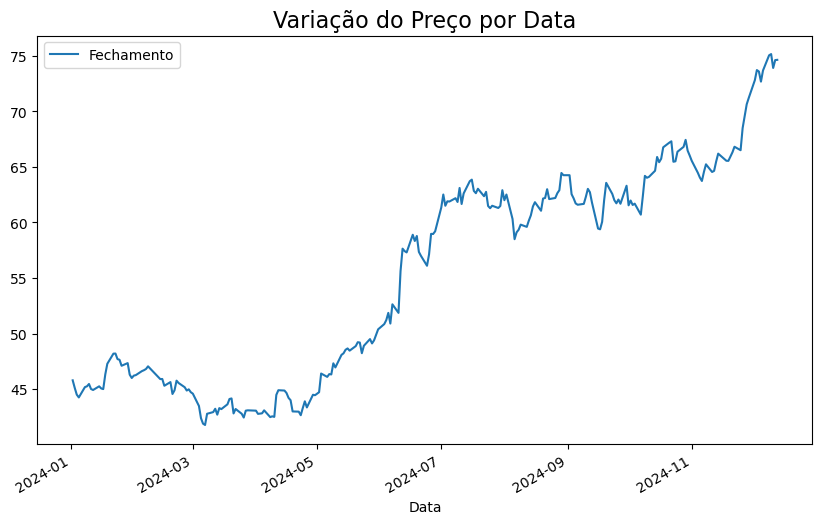

In [78]:
dados['Fechamento'].plot(figsize=(10,6))
plt.title('Variação do Preço por Data', fontsize=16)
plt.legend(['Fechamento'])

In [79]:
df = dados.copy()
df['Data'] = df.index
df['Data'] = df['Data'].apply(mdates.date2num)
df

,Fechamento_Ajuste,Fechamento,Maximo,Minimo,Abertura,Volume,Data
Data,,,,,,,
2024-01-02,45.63,45.79,46.17,45.21,46.01,183240,19724.00
2024-01-03,44.96,45.11,45.70,45.05,45.52,120009,19725.00
2024-01-04,44.35,44.50,45.07,44.46,44.86,246543,19726.00
2024-01-05,44.10,44.25,44.63,43.96,44.50,139128,19727.00
2024-01-08,45.03,45.18,45.18,44.25,44.25,299849,19730.00
...,...,...,...,...,...,...,...
2024-12-09,75.04,75.04,75.23,73.17,73.49,319138,20066.00
2024-12-10,75.15,75.15,75.32,74.25,75.04,253209,20067.00
2024-12-11,73.90,73.90,75.77,73.70,75.13,380779,20068.00


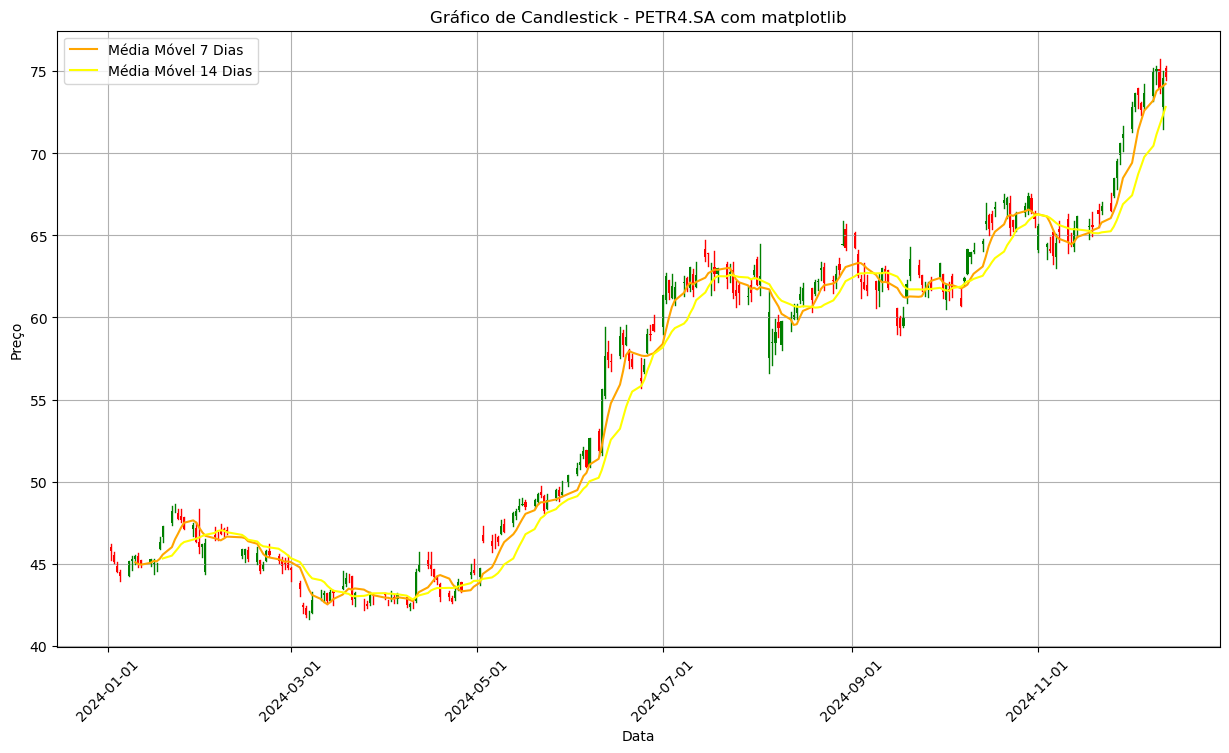

In [80]:
fig, ax = plt.subplots(figsize=(15, 8))

# Vamos definir a largura dos candles no gráfico
width = 0.7

for i in range(len(df)):
    # Determinando a cor do candle
    # Se o preço de fechamento for maior que o de abertura, o candle é verde (a ação valorizou nesse dia).
    # Se for menor, o candle é vermelho (a ação desvalorizou).
    if df['Fechamento'].iloc[i] > df['Abertura'].iloc[i]:
        color = 'green'
    else:
        color = 'red'

    # Desenhando a linha vertical do candle (mecha)
    # Essa linha mostra os preços máximo (topo da linha) e mínimo (base da linha) do dia.
    # Usamos `ax.plot` para desenhar uma linha vertical.
    # [df['Data'].iloc[i], df['Data'].iloc[i]] define o ponto x da linha (a data), e [df['Mínimo'].iloc[i], df['Máximo'].iloc[i]] define a altura da linha.
    ax.plot([df['Data'].iloc[i], df['Data'].iloc[i]],
            [df['Minimo'].iloc[i], df['Maximo'].iloc[i]],
            color=color,
            linewidth=1)

    ax.add_patch(plt.Rectangle((df['Data'].iloc[i] - width/2, min(df['Abertura'].iloc[i], df['Fechamento'].iloc[i])),
                               width,
                               abs(df['Fechamento'].iloc[i] - df['Abertura'].iloc[i]),
                               facecolor=color))

df['MA7'] = df['Fechamento'].rolling(window=7).mean()
df['MA14'] = df['Fechamento'].rolling(window=14).mean()

# Plotando as médias móveis
ax.plot(df['Data'], df['MA7'], color='orange', label='Média Móvel 7 Dias')  # Média de 7 dias
ax.plot(df['Data'], df['MA14'], color='yellow', label='Média Móvel 14 Dias')  # Média de 14 dias
# Adicionando legendas para as médias móveis
ax.legend()

# Formatando o eixo x para mostrar as datas
# Configuramos o formato da data e a rotação para melhor legibilidade
ax.xaxis_date() #O método xaxis_date() é usado para dizer ao Matplotlib que as datas estão sendo usadas no eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Adicionando título e rótulos para os eixos x e y
plt.title("Gráfico de Candlestick - PETR4.SA com matplotlib")
plt.xlabel("Data")
plt.ylabel("Preço")

# Adicionando uma grade para facilitar a visualização dos valores
plt.grid(True)

# Exibindo o gráfico
plt.show()

In [81]:
# Criando subplots
'''
"Primeiro, criamos uma figura que conterá nossos gráficos usando make_subplots.
Isso nos permite ter múltiplos gráficos em uma única visualização.
Aqui, teremos dois subplots: um para o gráfico de candlestick e outro para o volume de transações."

'''
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

'''
"No gráfico de candlestick, cada candle representa um dia de negociação,
mostrando o preço de abertura, fechamento, máximo e mínimo. Vamos adicionar este gráfico à nossa figura."
'''
# Adicionando o gráfico de candlestick
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Abertura'],
                             high=df['Maximo'],
                             low=df['Minimo'],
                             close=df['Fechamento'],
                             name='Candlestick'),
                             row=1, col=1)

# Adicionando as médias móveis
# Adicionamos também médias móveis ao mesmo subplot para análise de tendências
fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

# Adicionando o gráfico de barras para o volume
# Em seguida, criamos um gráfico de barras para o volume de transações, que nos dá uma ideia da atividade de negociação naquele dia
fig.add_trace(go.Bar(x=df.index,
                     y=df['Volume'],
                     name='Volume'),
                     row=2, col=1)

# Atualizando layout
#Finalmente, configuramos o layout da figura, ajustando títulos, formatos de eixo e outras configurações para tornar o gráfico claro e legível.
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,  # Desativa o range slider
                  width=1100, height=600)

# Mostrando o gráfico
fig.show()

In [82]:
dados = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

[*********************100%***********************]  1 of 1 completed


In [83]:
dados['Open'] = dados['Open'].astype(float)
dados

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2023-01-03,123.77,125.07,130.90,124.17,130.28,112117500
2023-01-04,125.05,126.36,128.66,125.08,126.89,89113600
2023-01-05,123.72,125.02,127.77,124.76,127.13,80962700
2023-01-06,128.27,129.62,130.29,124.89,126.01,87754700
2023-01-09,128.80,130.15,133.41,129.89,130.47,70790800
...,...,...,...,...,...,...
2023-12-22,192.66,193.60,195.41,192.97,195.18,37122800
2023-12-26,192.11,193.05,193.89,192.83,193.61,28919300


In [84]:
dados = yf.download('JNJ', start='2020-01-01', end='2023-12-31', progress=False)
dados = dados.reset_index()
dados

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,JNJ,JNJ,JNJ,JNJ,JNJ,JNJ
0,2020-01-02,127.06,145.97,146.02,145.08,145.87,5777000
1,2020-01-03,125.59,144.28,145.37,143.00,143.50,5752400
2,2020-01-06,125.44,144.10,144.20,142.85,144.00,7731300
3,2020-01-07,126.20,144.98,145.45,141.38,144.01,7382900
4,2020-01-08,126.19,144.96,145.98,143.70,144.87,6605800
...,...,...,...,...,...,...,...
1001,2023-12-22,150.69,155.46,156.53,155.02,155.25,3798500
1002,2023-12-26,151.35,156.14,156.35,154.85,155.00,4170000
1003,2023-12-27,151.55,156.35,156.52,155.42,155.50,5288100


In [85]:
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

In [86]:
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date' : 'ds', 'Close' : 'y'})
dados_prophet_treino

Price,ds,y
Ticker,,JNJ
0,2020-01-02,145.97
1,2020-01-03,144.28
2,2020-01-06,144.10
3,2020-01-07,144.98
4,2020-01-08,144.96
...,...,...
894,2023-07-24,171.08
895,2023-07-25,172.39
896,2023-07-26,172.72


In [87]:
modelo = Prophet(weekly_seasonality=True,
                 yearly_seasonality=True,
                 daily_seasonality=False)

modelo.add_country_holidays(country_name='US')

modelo.fit(dados_prophet_treino)

AttributeError: 'Prophet' object has no attribute 'stan_backend'